In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/123/SuicideChina.csv")
df

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide
...,...,...,...,...,...,...,...,...,...,...,...,...
2566,2567,2567,yes,no,unknown,2010,7,male,28,primary,household,Pesticide
2567,2568,2568,yes,no,unknown,2011,6,male,35,Secondary,farming,Pesticide
2568,2569,2569,yes,no,unknown,2011,9,female,22,Secondary,unemployed,Other poison
2569,2570,2570,yes,no,unknown,2010,8,female,50,Secondary,farming,Pesticide


In [ ]:
df.shape

(2571, 12)

In [ ]:
df.head(5)

,Unnamed: 0,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Person_ID,0
Hospitalised,0
Died,0
Urban,0
Year,0
Month,0
Sex,0
Age,0
Education,0


In [ ]:
df.describe()

,Unnamed: 0,Person_ID,Year,Month,Age
count,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000
mean,1286.000000,1286.000000,2010.045508,6.298327,52.630883
std,742.328095,742.328095,0.791412,3.202515,19.783878
min,1.000000,1.000000,2009.000000,1.000000,12.000000
25%,643.500000,643.500000,2009.000000,4.000000,37.000000
50%,1286.000000,1286.000000,2010.000000,6.000000,53.000000
75%,1928.500000,1928.500000,2011.000000,9.000000,69.000000
max,2571.000000,2571.000000,2011.000000,12.000000,100.000000


In [ ]:
df["Sex"].value_counts()

,count
Sex,
female,1328
male,1243


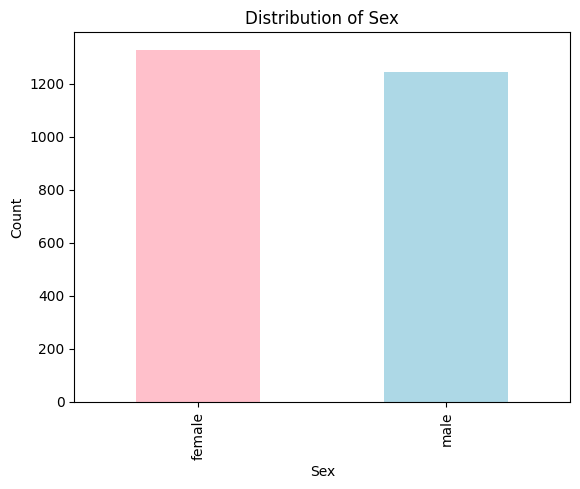

In [ ]:
df["Sex"].value_counts().plot(kind = "bar", color = ["pink", "lightblue"])

plt.title("Distribution of Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [ ]:
gender_suicide_rate = df.groupby("Sex")["Died"].value_counts()
gender_suicide_rate

Sex     Died
female  no      741
        yes     587
male    yes     669
        no      574
Name: count, dtype: int64

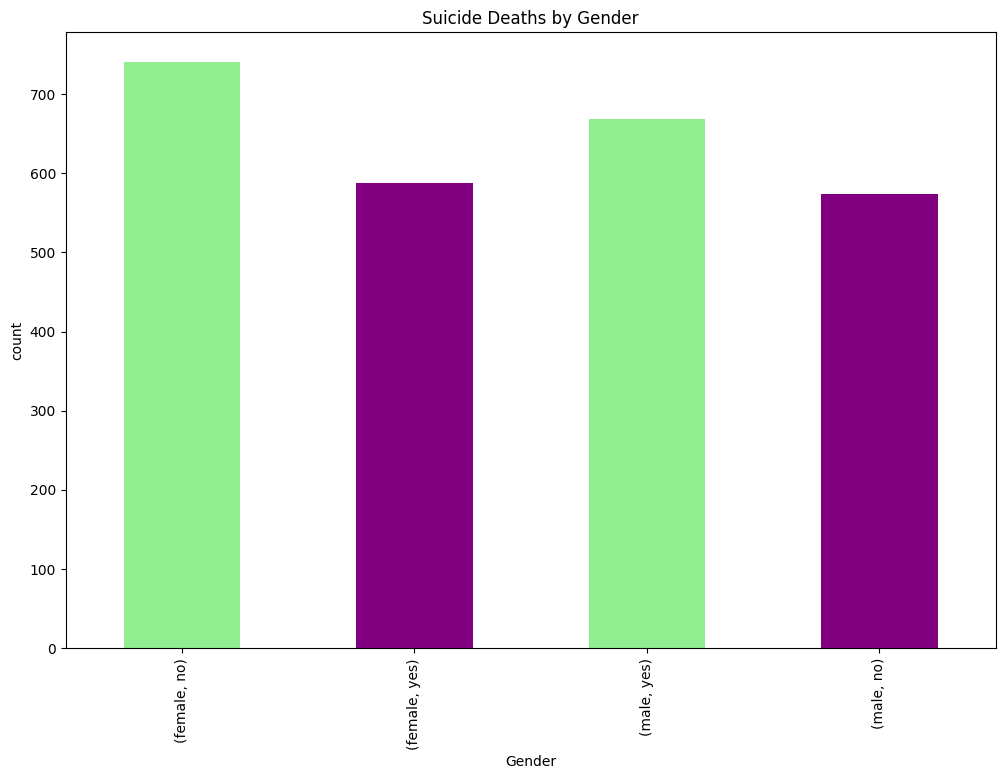

In [ ]:
gender_suicide_rate.plot(kind = "bar", figsize = (12, 8), color = ["lightgreen", "purple"])
plt.title("Suicide Deaths by Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.show()

In [ ]:
gender_hospitalised = df.groupby("Hospitalised")["Sex"].value_counts()
gender_hospitalised

Hospitalised  Sex   
no            male      549
              female    469
yes           female    859
              male      694
Name: count, dtype: int64

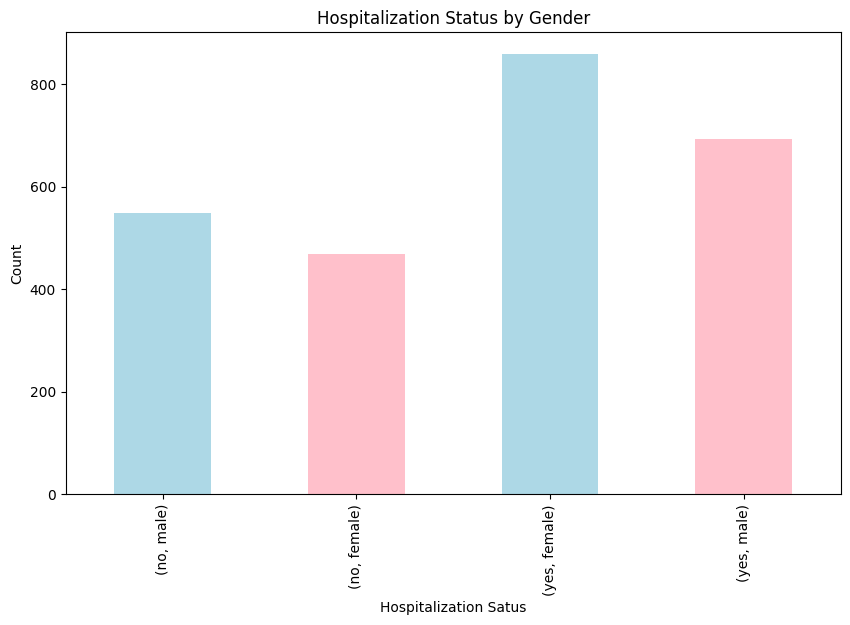

In [ ]:
gender_hospitalised.plot(kind='bar', figsize=(10, 6), color=["lightblue", "pink"])
plt.title("Hospitalization Status by Gender")
plt.xlabel("Hospitalization Satus")
plt.ylabel("Count")
plt.show()

In [ ]:
gender_methods = df.groupby("Sex")["method"].value_counts().unstack().fillna(0)
gender_methods

method,Cutting,Drowning,Hanging,Jumping,Other poison,Others,Pesticide,Poison unspec,unspecified
Sex,,,,,,,,,
female,14.0,16.0,170.0,8.0,96.0,0.0,952.0,54.0,18.0
male,15.0,10.0,261.0,7.0,50.0,1.0,816.0,53.0,30.0


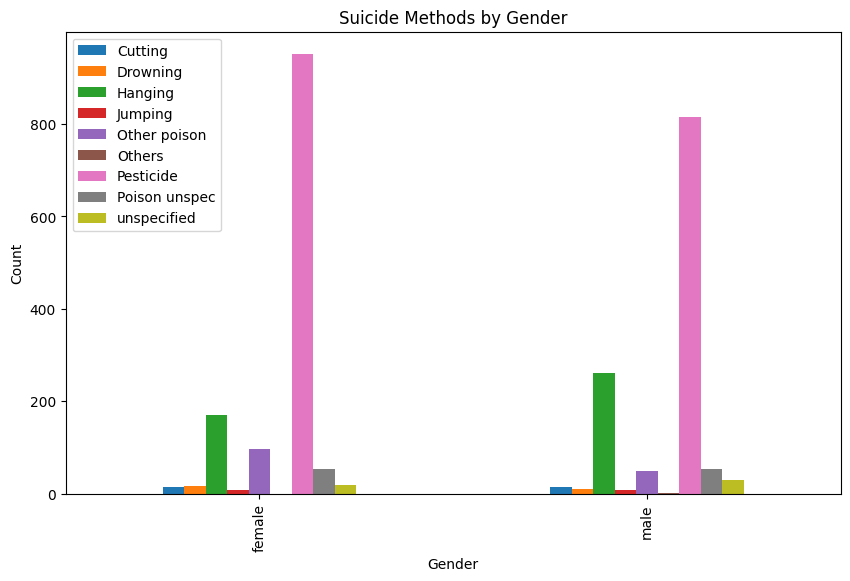

In [ ]:
gender_methods.plot(kind = "bar", figsize = (10, 6))

plt.title("Suicide Methods by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()


In [ ]:
df["Occupation"].value_counts()

,count
Occupation,
farming,2032
household,248
others/unknown,156
professional,37
student,35
unemployed,30
business/service,21
worker,6
others,3


<ipython-input-17-90e2527aaeb3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Occupation", data = df, palette = "bright", order = df["Occupation"].value_counts().index)


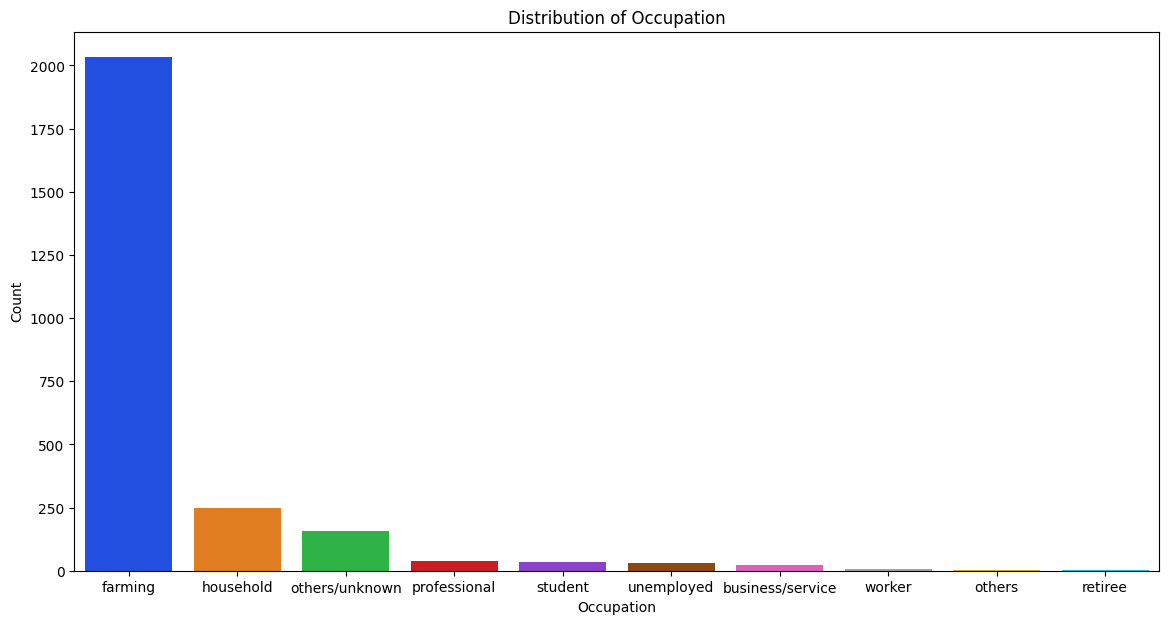

In [ ]:
plt.figure(figsize = (14, 7))
sns.countplot(x = "Occupation", data = df, palette = "bright", order = df["Occupation"].value_counts().index)
plt.title("Distribution of Occupation")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

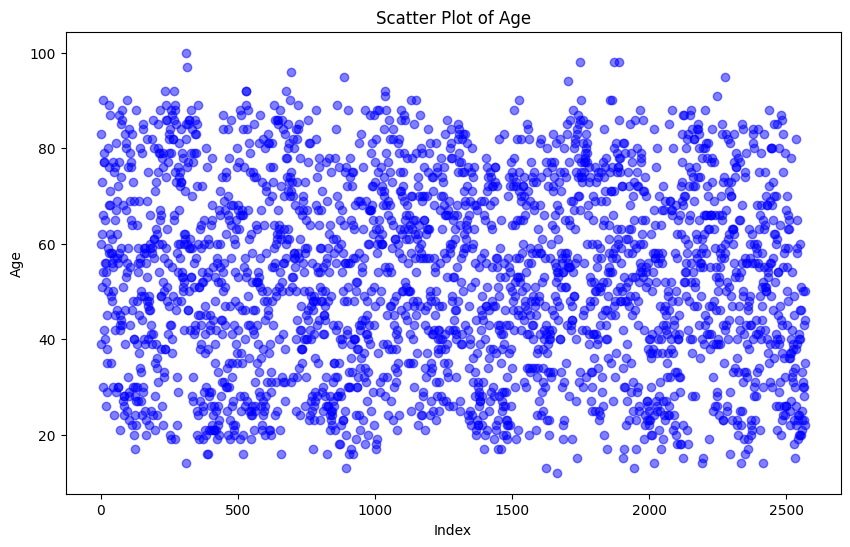

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(df.index, df["Age"], alpha = 0.5, color = "blue")
plt.title("Scatter Plot of Age")
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()

In [ ]:
yearly_suicides = df.groupby("Year").size()
yearly_suicides

,0
Year,
2009,749
2010,956
2011,866


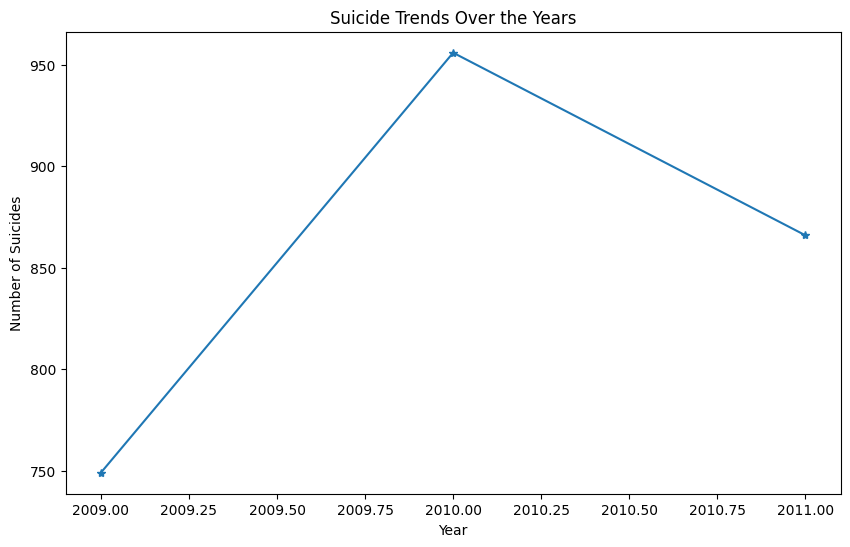

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(yearly_suicides.index, yearly_suicides.values, marker = "*")
plt.title("Suicide Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Suicides")
plt.show()

In [ ]:
monthly_suicides = df.groupby(["Year", "Month"]).size().unstack(level = 0)
monthly_suicides

Year,2009,2010,2011
Month,,,
1,54,83,64
2,57,83,68
3,60,77,53
4,58,82,68
5,77,89,97
6,87,105,92
7,67,97,83
8,61,90,78
9,81,83,77


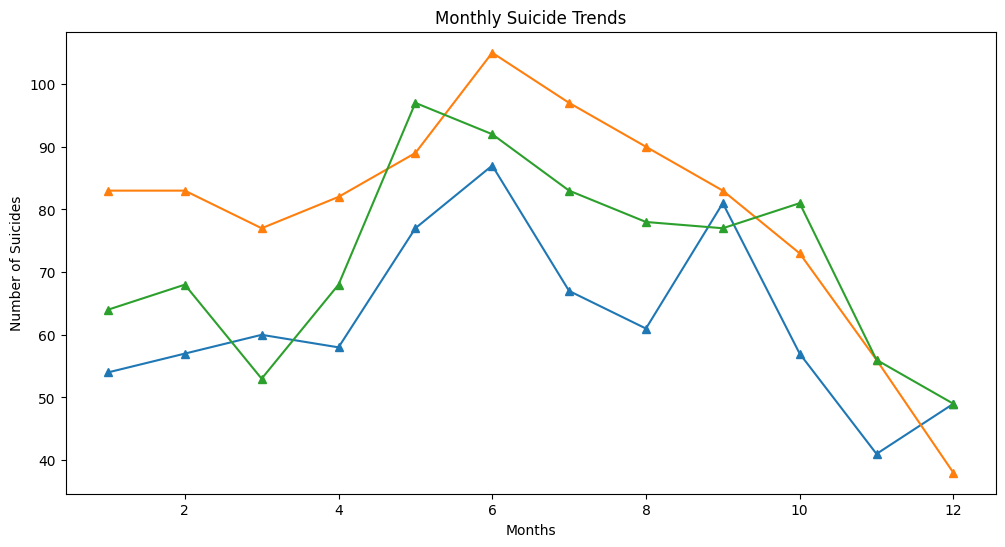

In [ ]:
plt.figure(figsize = (12, 6))
plt.plot(monthly_suicides.index, monthly_suicides.values, marker = "^")
plt.title("Monthly Suicide Trends")
plt.xlabel("Months")
plt.ylabel("Number of Suicides")
plt.show()

In [ ]:
df["Urban"].value_counts()

,count
Urban,
no,2213
yes,277
unknown,81


In [ ]:
df = df[df["Urban"] != "unknown"]


In [ ]:
df["Urban"].value_counts()

,count
Urban,
no,2213
yes,277


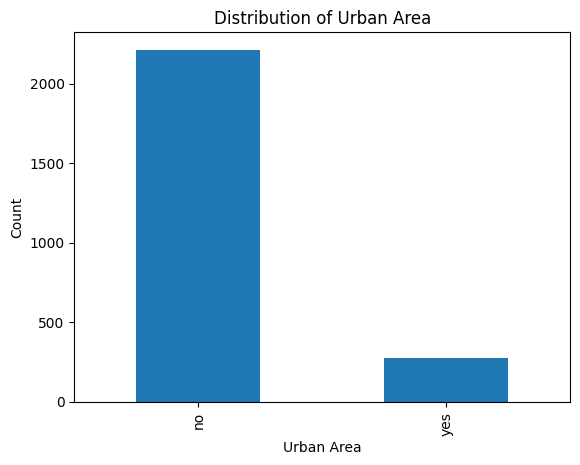

In [ ]:
df["Urban"].value_counts().plot.bar()

plt.title("Distribution of Urban Area")
plt.xlabel("Urban Area")
plt.ylabel("Count")
plt.show()

In [ ]:
urban_rural_rates = df.groupby("Died")["Urban"].size()
urban_rural_rates

,Urban
Died,
no,1236
yes,1254


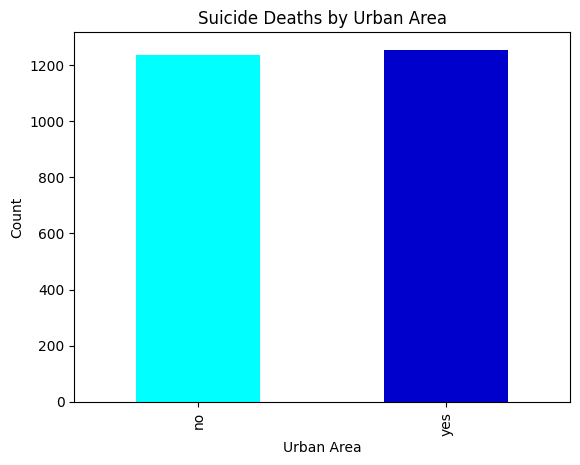

In [ ]:
urban_rural_rates.plot(kind = "bar", color = ["aqua", "mediumblue"])

plt.title("Suicide Deaths by Urban Area")
plt.xlabel("Urban Area")
plt.ylabel("Count")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2490 entries, 0 to 2489
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2490 non-null   int64 
 1   Person_ID     2490 non-null   int64 
 2   Hospitalised  2490 non-null   object
 3   Died          2490 non-null   object
 4   Urban         2490 non-null   object
 5   Year          2490 non-null   int64 
 6   Month         2490 non-null   int64 
 7   Sex           2490 non-null   object
 8   Age           2490 non-null   int64 
 9   Education     2490 non-null   object
 10  Occupation    2490 non-null   object
 11  method        2490 non-null   object
dtypes: int64(5), object(7)
memory usage: 252.9+ KB


In [ ]:
df["Education"].value_counts()

,count
Education,
Secondary,1216
primary,652
iliterate,528
unknown,76
Tertiary,18


In [ ]:
df = df[df["Education"] != 'unknown']

Text(0.5, 1.0, 'Distribution of Education Level')

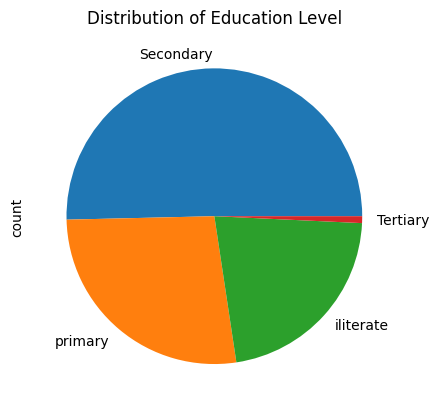

In [ ]:
df["Education"].value_counts().plot.pie()

plt.title("Distribution of Education Level")

In [ ]:
df["method"].value_counts()

,count
method,
Pesticide,1665
Hanging,422
Other poison,127
Poison unspec,90
unspecified,44
Cutting,27
Drowning,26
Jumping,13


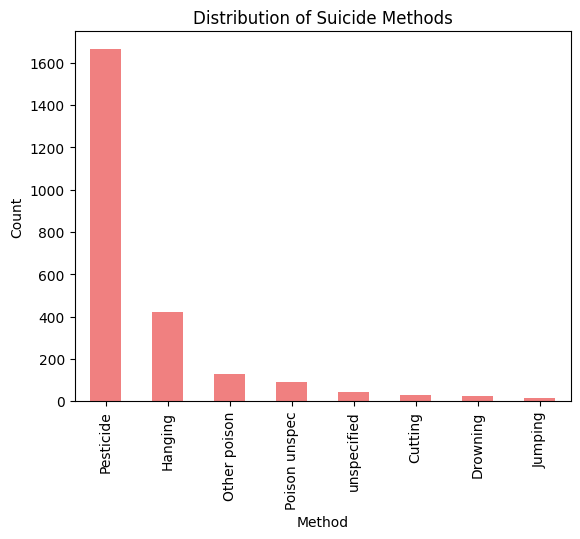

In [ ]:
df["method"].value_counts().plot(kind = "bar", color = "lightcoral")

plt.title("Distribution of Suicide Methods")
plt.xlabel("Method")
plt.ylabel("Count")
plt.show()